In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./製造數據hw3'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./製造數據hw3\DRpredict.xlsx
./製造數據hw3\DRtraining.xlsx
./製造數據hw3\SECOM.xlsx
./製造數據hw3\~$SECOM.xlsx


In [2]:
filename = './製造數據hw3/SECOM.xlsx' 
raw_file = open(filename, 'rt')
data = pd.read_excel(filename, sheet_name = None)
df = data.get('secom') # get a specific sheet to DataFrame
df

,Unnamed: 0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
0,1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,4,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,5,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1563,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1563,1564,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1564,1565,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1565,1566,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


In [3]:
df = df.drop('Unnamed: 0', 1)

In [4]:
df

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


In [66]:
d = df.loc[:,~df.columns.duplicated()]

In [68]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [69]:
no_redundant_df = df.drop_duplicates(keep=False)

In [70]:
no_redundant_df

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


In [5]:
null_num = df.isnull().sum()

In [77]:
sort_null = null_num.sort_values(ascending=False)

In [78]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(sort_null)

Sensor_294    1429
Sensor_293    1429
Sensor_158    1429
Sensor_159    1429
Sensor_86     1341
Sensor_221    1341
Sensor_359    1341
Sensor_493    1341
Sensor_383    1018
Sensor_384    1018
Sensor_519    1018
Sensor_518    1018
Sensor_517    1018
Sensor_111    1018
Sensor_110    1018
Sensor_245    1018
Sensor_112    1018
Sensor_246    1018
Sensor_247    1018
Sensor_385    1018
Sensor_580     949
Sensor_581     949
Sensor_582     949
Sensor_579     949
Sensor_73      794
Sensor_74      794
Sensor_346     794
Sensor_347     794
Sensor_386     715
Sensor_113     715
Sensor_248     715
Sensor_520     715
Sensor_564     273
Sensor_568     273
Sensor_569     273
Sensor_570     273
Sensor_567     273
Sensor_565     273
Sensor_563     273
Sensor_566     273
Sensor_554     260
Sensor_555     260
Sensor_558     260
Sensor_557     260
Sensor_553     260
Sensor_556     260
Sensor_547     260
Sensor_548     260
Sensor_549     260
Sensor_551     260
Sensor_552     260
Sensor_550     260
Sensor_226  

In [89]:
re_df = df
idx = df[df.isnull().sum(axis=1) <= 10].index
if len(idx) > 0:
    re_df = df.iloc[idx[0]:]
re_df

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
773,2962.28,2452.28,2127.9555,1011.1924,1.0863,100.0,107.1522,0.1261,1.4432,0.0085,...,0.4989,0.0082,0.0024,1.6355,0.0373,0.0079,0.0030,21.0599,-1,10/09/2008 09:21:00
774,3070.63,2377.97,2130.0556,874.9165,1.2545,100.0,105.9011,0.1253,1.4374,-0.0117,...,0.5013,0.0111,0.0026,2.2141,0.0373,0.0079,0.0030,21.0599,-1,10/09/2008 20:52:00
775,3055.13,2523.65,2181.0444,939.8456,1.3968,100.0,104.0133,0.1214,1.3619,-0.0228,...,0.4964,0.0136,0.0038,2.7445,0.0373,0.0079,0.0030,21.0599,-1,10/09/2008 20:53:00
776,2899.68,2492.24,2127.9555,1011.1924,1.0863,100.0,107.1522,0.1261,1.4723,-0.0093,...,0.4974,0.0181,0.0042,3.6452,0.0373,0.0079,0.0030,21.0599,-1,10/09/2008 21:56:00
777,2957.04,2525.16,2190.1555,1298.8207,1.3947,100.0,105.7411,0.1242,1.4080,-0.0032,...,0.4995,0.0144,0.0030,2.8807,0.0373,0.0079,0.0030,21.0599,-1,10/09/2008 23:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


In [90]:
re_df.describe()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
count,793.000000,791.000000,781.000000,781.000000,781.000000,781.0,781.000000,786.000000,792.000000,792.000000,...,324.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,3020.944023,2495.500051,2201.259835,1489.851253,7.101860,100.0,99.595089,0.121332,1.446945,0.000323,...,97.548978,0.500035,0.015081,0.003778,3.021094,0.022952,0.015989,0.005151,92.515081,-0.906801
std,81.270568,71.253980,30.365235,537.849921,79.386623,0.0,7.799251,0.012470,0.079913,0.014721,...,90.919983,0.003210,0.016936,0.003675,3.535438,0.013572,0.009164,0.003104,90.751935,0.421825
min,2770.400000,2233.290000,2060.660000,0.000000,0.753100,100.0,82.131100,0.000000,1.200500,-0.036800,...,0.000000,0.477800,0.006000,0.002000,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2970.860000,2452.215000,2186.900000,1111.476400,1.121500,100.0,95.787800,0.121200,1.391625,-0.009400,...,44.113575,0.498000,0.011500,0.003100,2.302275,0.015200,0.009800,0.003200,41.078200,-1.000000
50%,3014.160000,2499.680000,2202.455600,1298.820700,1.317400,100.0,99.418900,0.122700,1.439300,-0.000100,...,70.136550,0.500000,0.013550,0.003500,2.714400,0.021800,0.014600,0.004500,67.427450,-1.000000
75%,3062.340000,2537.670000,2216.811100,1807.584100,1.601300,100.0,104.013300,0.124100,1.499475,0.009000,...,116.785575,0.502175,0.016200,0.004000,3.236950,0.027800,0.019375,0.006075,104.303400,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509500,0.471400,0.103900,98.662800,0.102800,0.079900,0.028600,737.304800,1.000000


In [91]:
df = re_df
df_fillna_mean = df.fillna(df.mean())
df_fillna_mean.describe()
df_fillna_mean

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
773,2962.28,2452.28,2127.9555,1011.1924,1.0863,100.0,107.1522,0.1261,1.443200,0.008500,...,0.4989,0.0082,0.0024,1.6355,0.0373,0.0079,0.0030,21.0599,-1,10/09/2008 09:21:00
774,3070.63,2377.97,2130.0556,874.9165,1.2545,100.0,105.9011,0.1253,1.437400,-0.011700,...,0.5013,0.0111,0.0026,2.2141,0.0373,0.0079,0.0030,21.0599,-1,10/09/2008 20:52:00
775,3055.13,2523.65,2181.0444,939.8456,1.3968,100.0,104.0133,0.1214,1.361900,-0.022800,...,0.4964,0.0136,0.0038,2.7445,0.0373,0.0079,0.0030,21.0599,-1,10/09/2008 20:53:00
776,2899.68,2492.24,2127.9555,1011.1924,1.0863,100.0,107.1522,0.1261,1.472300,-0.009300,...,0.4974,0.0181,0.0042,3.6452,0.0373,0.0079,0.0030,21.0599,-1,10/09/2008 21:56:00
777,2957.04,2525.16,2190.1555,1298.8207,1.3947,100.0,105.7411,0.1242,1.408000,-0.003200,...,0.4995,0.0144,0.0030,2.8807,0.0373,0.0079,0.0030,21.0599,-1,10/09/2008 23:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.446945,0.000323,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


In [92]:
df_fillna_mean.isnull().sum()

Sensor_1      0
Sensor_2      0
Sensor_3      0
Sensor_4      0
Sensor_5      0
             ..
Sensor_588    0
Sensor_589    0
Sensor_590    0
Label         0
Time          0
Length: 592, dtype: int64

In [93]:
x = df_fillna_mean.iloc[:,:-2]
y = df_fillna_mean.iloc[:,-2:-1]

In [94]:
x

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_581,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590
773,2962.28,2452.28,2127.9555,1011.1924,1.0863,100.0,107.1522,0.1261,1.443200,0.008500,...,0.003000,21.059900,0.4989,0.0082,0.0024,1.6355,0.0373,0.0079,0.0030,21.0599
774,3070.63,2377.97,2130.0556,874.9165,1.2545,100.0,105.9011,0.1253,1.437400,-0.011700,...,0.005421,97.548978,0.5013,0.0111,0.0026,2.2141,0.0373,0.0079,0.0030,21.0599
775,3055.13,2523.65,2181.0444,939.8456,1.3968,100.0,104.0133,0.1214,1.361900,-0.022800,...,0.005421,97.548978,0.4964,0.0136,0.0038,2.7445,0.0373,0.0079,0.0030,21.0599
776,2899.68,2492.24,2127.9555,1011.1924,1.0863,100.0,107.1522,0.1261,1.472300,-0.009300,...,0.005421,97.548978,0.4974,0.0181,0.0042,3.6452,0.0373,0.0079,0.0030,21.0599
777,2957.04,2525.16,2190.1555,1298.8207,1.3947,100.0,105.7411,0.1242,1.408000,-0.003200,...,0.005421,97.548978,0.4995,0.0144,0.0030,2.8807,0.0373,0.0079,0.0030,21.0599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,0.004700,203.172000,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,0.005421,97.548978,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.446945,0.000323,...,0.002500,43.523100,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,0.007500,93.494100,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [95]:
y

,Label
773,-1
774,-1
775,-1
776,-1
777,-1
...,...
1562,-1
1563,-1
1564,-1
1565,-1


In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44)

In [97]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(635, 590)
(159, 590)
(635, 1)
(159, 1)


In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_train_scale = pd.DataFrame(x_train_scale,columns = x_train.columns)
x_train_scale.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_581,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590
0,-0.171688,0.310667,1.748974,0.883996,-0.060938,0.0,-1.096360,0.086856,1.794383,-0.513749,...,1.834281,-0.835168,0.603159,-0.217654,-0.171182,-0.210311,2.048516,0.964739,1.360153,-0.480730
1,0.953069,1.232578,0.555100,-0.565970,-0.066184,0.0,-0.263206,-0.096313,-2.007847,1.601026,...,0.016249,0.000670,0.166294,0.182044,0.245671,0.171300,0.485054,-0.045014,-0.191399,-0.437572
2,-0.777013,0.206197,0.806559,1.380910,-0.072418,0.0,-0.878763,0.211744,-1.147819,0.267505,...,0.016249,0.000670,0.665569,-0.318910,-0.293786,-0.310542,-0.463397,-0.289130,-0.385343,-0.134727
3,-0.924117,-0.522997,0.247601,0.104453,-0.069022,0.0,-0.559255,-0.063009,-0.110504,-0.877437,...,0.016249,0.000670,0.041475,-0.201666,-0.171182,-0.194673,0.047878,-0.666400,-0.611611,-0.558218
4,0.314423,-0.269723,0.993861,0.813810,-0.071811,0.0,-0.333700,0.086856,0.046665,-0.150062,...,-0.743482,-0.298611,-1.113098,-0.105738,-0.048578,-0.098371,-0.559724,-0.388996,-0.417667,-0.125366


In [99]:
x_test_scale = sc.fit_transform(x_test)
x_test_scale = pd.DataFrame(x_test_scale,columns = x_test.columns)
x_test_scale.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_581,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590
0,2.437320,-1.541512,-0.279505,-0.842848,-0.087041,0.0,0.317885,-0.031401,0.377284,-0.142854,...,-0.056452,-0.002891,-1.834375,-0.481676,-0.415133,-0.457827,0.365735,-0.920783,-1.020395,-0.722656
1,2.490316,0.034477,0.440834,0.125537,-0.082096,0.0,-0.347272,0.178147,-0.968049,-1.369089,...,-0.056452,-0.002891,-0.436765,3.440103,3.025949,3.473790,-1.998807,-0.342640,-0.604142,1.925869
2,1.961703,0.323462,-0.352701,-0.210561,-0.087858,0.0,0.258673,-0.089208,0.219812,-1.133823,...,-0.056452,-0.002891,0.743438,0.534329,0.314793,0.520898,-0.436908,0.710407,0.708658,0.424017
3,-0.614536,0.443703,0.208936,0.659345,-0.081647,0.0,-1.111234,0.322663,0.146656,-0.449413,...,-0.056452,-0.002891,-0.312533,-0.014314,0.210518,-0.012702,-0.068126,-0.590415,-0.604142,-0.493461
4,-0.220310,-0.564566,-0.584595,-0.763528,-0.086559,0.0,-0.785521,0.098663,-1.853365,1.361422,...,-0.146553,2.832480,-0.064069,0.412409,0.836169,0.415605,-1.232319,-0.198104,-0.059810,1.576035


In [100]:
from sklearn.decomposition import PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scale)
print('Eigenvectors:',pca.components_)
print('Eigenvalues:',pca.explained_variance_)

Eigenvectors: [[-8.16826515e-03  3.51443237e-04  3.82800765e-03 ...  3.22182121e-03
   4.92503754e-03  3.59408196e-02]
 [ 1.14903777e-02 -1.99571287e-05 -5.40340591e-03 ... -4.11667415e-02
  -3.70912352e-02 -4.74905291e-02]
 [-9.48716567e-03  1.01553884e-02 -2.67964665e-02 ... -2.20747675e-02
  -2.19883626e-02 -1.50688535e-02]
 ...
 [-0.00000000e+00 -4.36757277e-32  2.35005833e-31 ...  9.59980149e-32
   2.73531181e-32 -8.27630778e-32]
 [ 0.00000000e+00  4.23129066e-32 -9.40532383e-32 ...  1.28659267e-32
  -3.07648501e-32  2.88092036e-32]
 [-0.00000000e+00  4.89231345e-33  9.25095219e-32 ... -6.94591148e-32
   4.44122454e-32 -1.79156624e-32]]
Eigenvalues: [3.15950472e+01 1.47702127e+01 1.17528482e+01 1.11792189e+01
 1.06472801e+01 1.00893329e+01 9.20050705e+00 8.71222553e+00
 8.07008261e+00 7.80013305e+00 7.68664251e+00 7.14049879e+00
 6.80237166e+00 6.56237647e+00 6.45546393e+00 6.24310193e+00
 6.00823082e+00 5.96309614e+00 5.81564471e+00 5.56676729e+00
 5.49568785e+00 5.17980613e+00 5

In [101]:
from sklearn.decomposition import PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scale)
print('Eigenvectors:',pca.components_)
print('Eigenvalues:',pca.explained_variance_)

Eigenvectors: [[-8.16826515e-03  3.51443237e-04  3.82800765e-03 ...  3.22182121e-03
   4.92503754e-03  3.59408196e-02]
 [ 1.14903777e-02 -1.99571287e-05 -5.40340591e-03 ... -4.11667415e-02
  -3.70912352e-02 -4.74905291e-02]
 [-9.48716567e-03  1.01553884e-02 -2.67964665e-02 ... -2.20747675e-02
  -2.19883626e-02 -1.50688535e-02]
 ...
 [-0.00000000e+00 -4.36757277e-32  2.35005833e-31 ...  9.59980149e-32
   2.73531181e-32 -8.27630778e-32]
 [ 0.00000000e+00  4.23129066e-32 -9.40532383e-32 ...  1.28659267e-32
  -3.07648501e-32  2.88092036e-32]
 [-0.00000000e+00  4.89231345e-33  9.25095219e-32 ... -6.94591148e-32
   4.44122454e-32 -1.79156624e-32]]
Eigenvalues: [3.15950472e+01 1.47702127e+01 1.17528482e+01 1.11792189e+01
 1.06472801e+01 1.00893329e+01 9.20050705e+00 8.71222553e+00
 8.07008261e+00 7.80013305e+00 7.68664251e+00 7.14049879e+00
 6.80237166e+00 6.56237647e+00 6.45546393e+00 6.24310193e+00
 6.00823082e+00 5.96309614e+00 5.81564471e+00 5.56676729e+00
 5.49568785e+00 5.17980613e+00 5

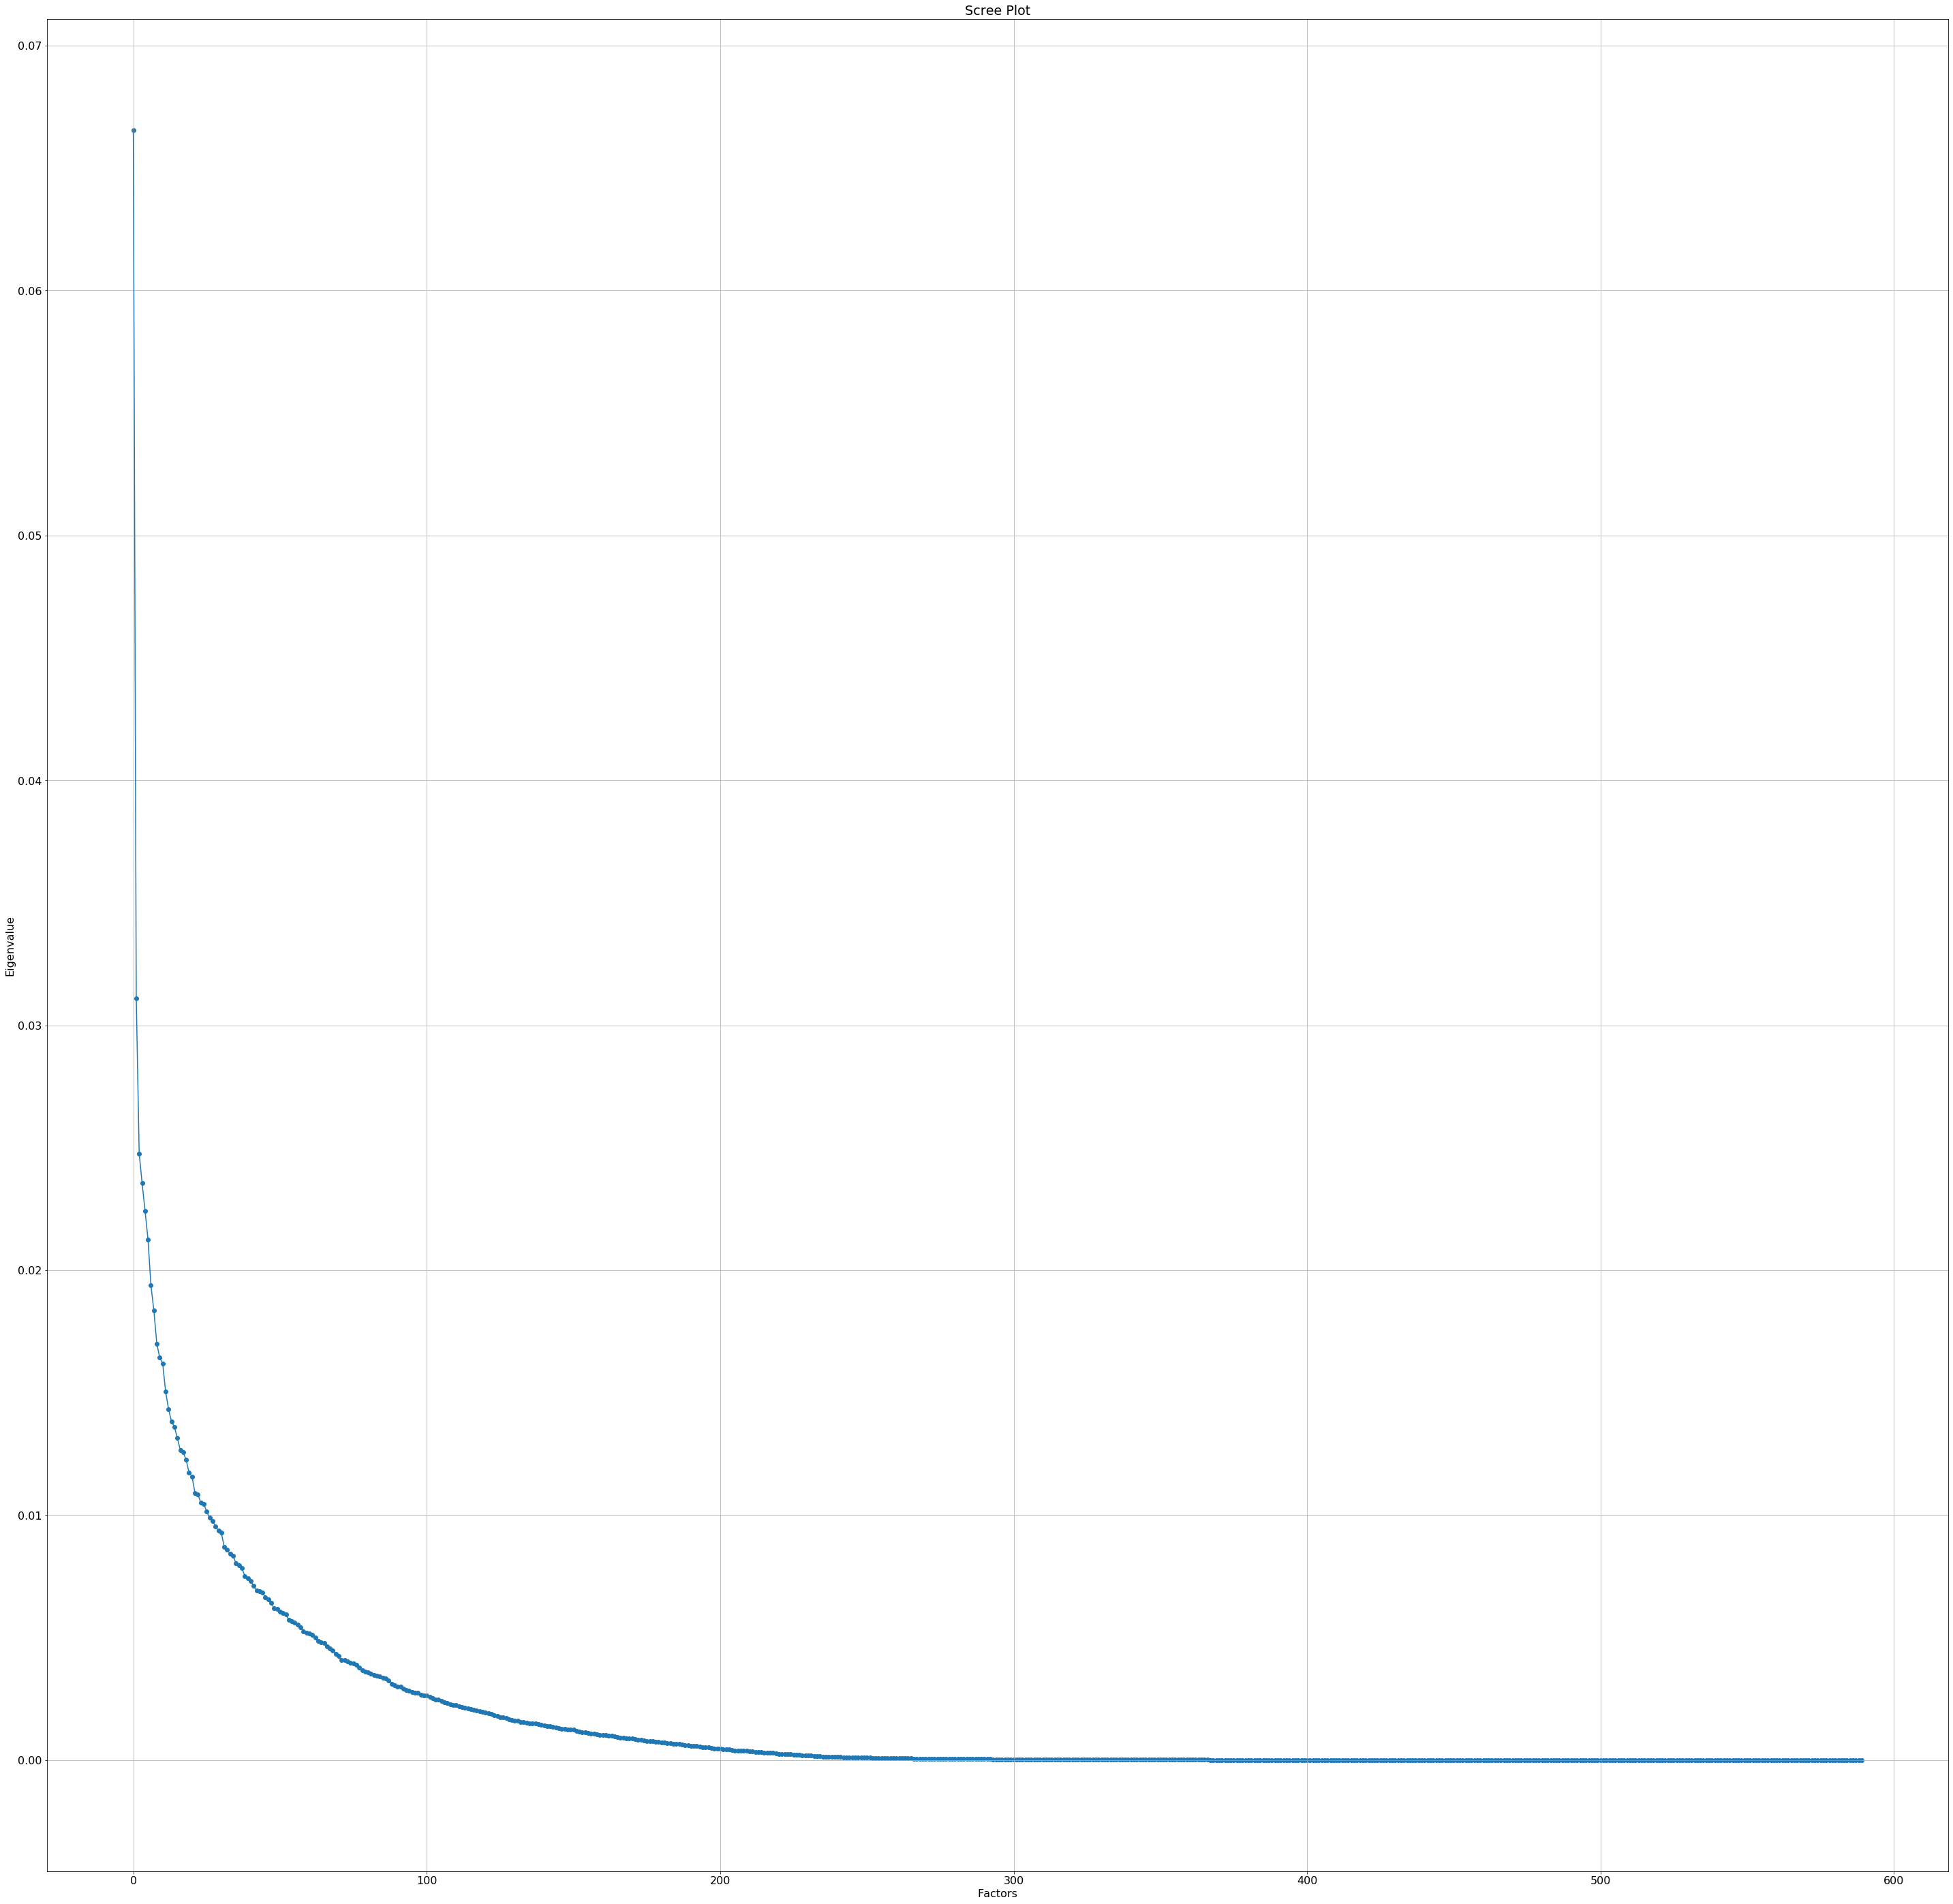

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
importance = pca.explained_variance_ratio_
plt.rc('font', size=16)  
plt.figure(figsize=(50,50))
plt.scatter(range(0,590),importance)
plt.plot(range(0,590),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [103]:
pca = PCA(n_components=50)
x_train_pca_res = pca.fit_transform(x_train_pca)
x_train_pca_res.shape

(635, 50)

In [104]:
test_x_pca_res = pca.transform(x_test_scale)
test_x_pca_res.shape

(159, 50)

In [105]:
from sklearn import tree

In [106]:
clf = tree.DecisionTreeClassifier()
secom_clf = clf.fit(x_train_pca_res, y_train)


In [107]:
test_y_predicted = secom_clf.predict(test_x_pca_res)
print(test_y_predicted.shape)

(159,)


In [108]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, test_y_predicted)
print("Accuracy:",accuracy)
print("Precision:",metrics.precision_score(y_test, test_y_predicted))

Accuracy: 0.9308176100628931
Precision: 1.0


Text(0.5, 1, "('Accuracy Score: {0}', 0.9308176100628931)")

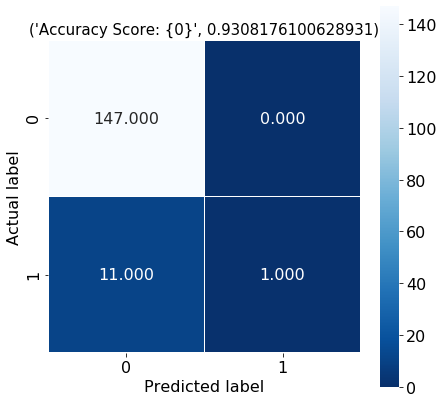

In [109]:
cm = metrics.confusion_matrix(y_test, test_y_predicted)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}',accuracy
plt.title(all_sample_title, size = 15)

# 調整dct參數-max_depth

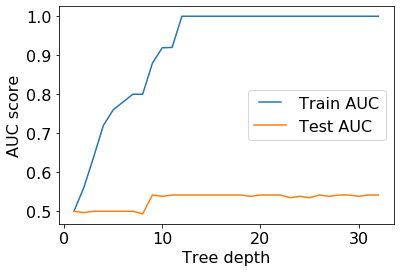

In [110]:
from sklearn.metrics import roc_curve, auc
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(x_train_pca_res, y_train)
    train_pred = clf.predict(x_train_pca_res)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = clf.predict(test_x_pca_res)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, label="Train AUC")
line2, = plt.plot(max_depths, test_results,label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

[Text(270.7370028409091, 209.07692307692307, 'X[39] <= 4.73\ngini = 0.076\nsamples = 635\nvalue = [610, 25]'),
 Text(226.9649147727273, 192.35076923076923, 'X[49] <= 3.134\ngini = 0.068\nsamples = 629\nvalue = [607, 22]'),
 Text(169.85710227272727, 175.62461538461537, 'X[21] <= -4.94\ngini = 0.054\nsamples = 612\nvalue = [595, 17]'),
 Text(138.54886363636365, 158.89846153846153, 'X[21] <= -5.336\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(128.4034090909091, 142.1723076923077, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(148.6943181818182, 142.1723076923077, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(201.16534090909093, 158.89846153846153, 'X[9] <= 5.796\ngini = 0.045\nsamples = 602\nvalue = [588, 14]'),
 Text(168.9852272727273, 142.1723076923077, 'X[44] <= 5.665\ngini = 0.039\nsamples = 597\nvalue = [585, 12]'),
 Text(135.06136363636364, 125.44615384615385, 'X[48] <= 3.869\ngini = 0.036\nsamples = 595\nvalue = [584, 11]'),
 Text(97.65, 108.72, 'X[0] <= 2.174\ngini =

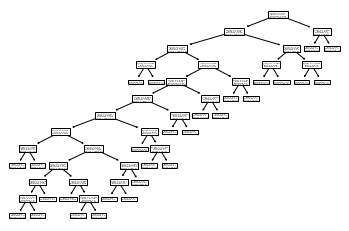

In [111]:
tree.plot_tree(clf) 

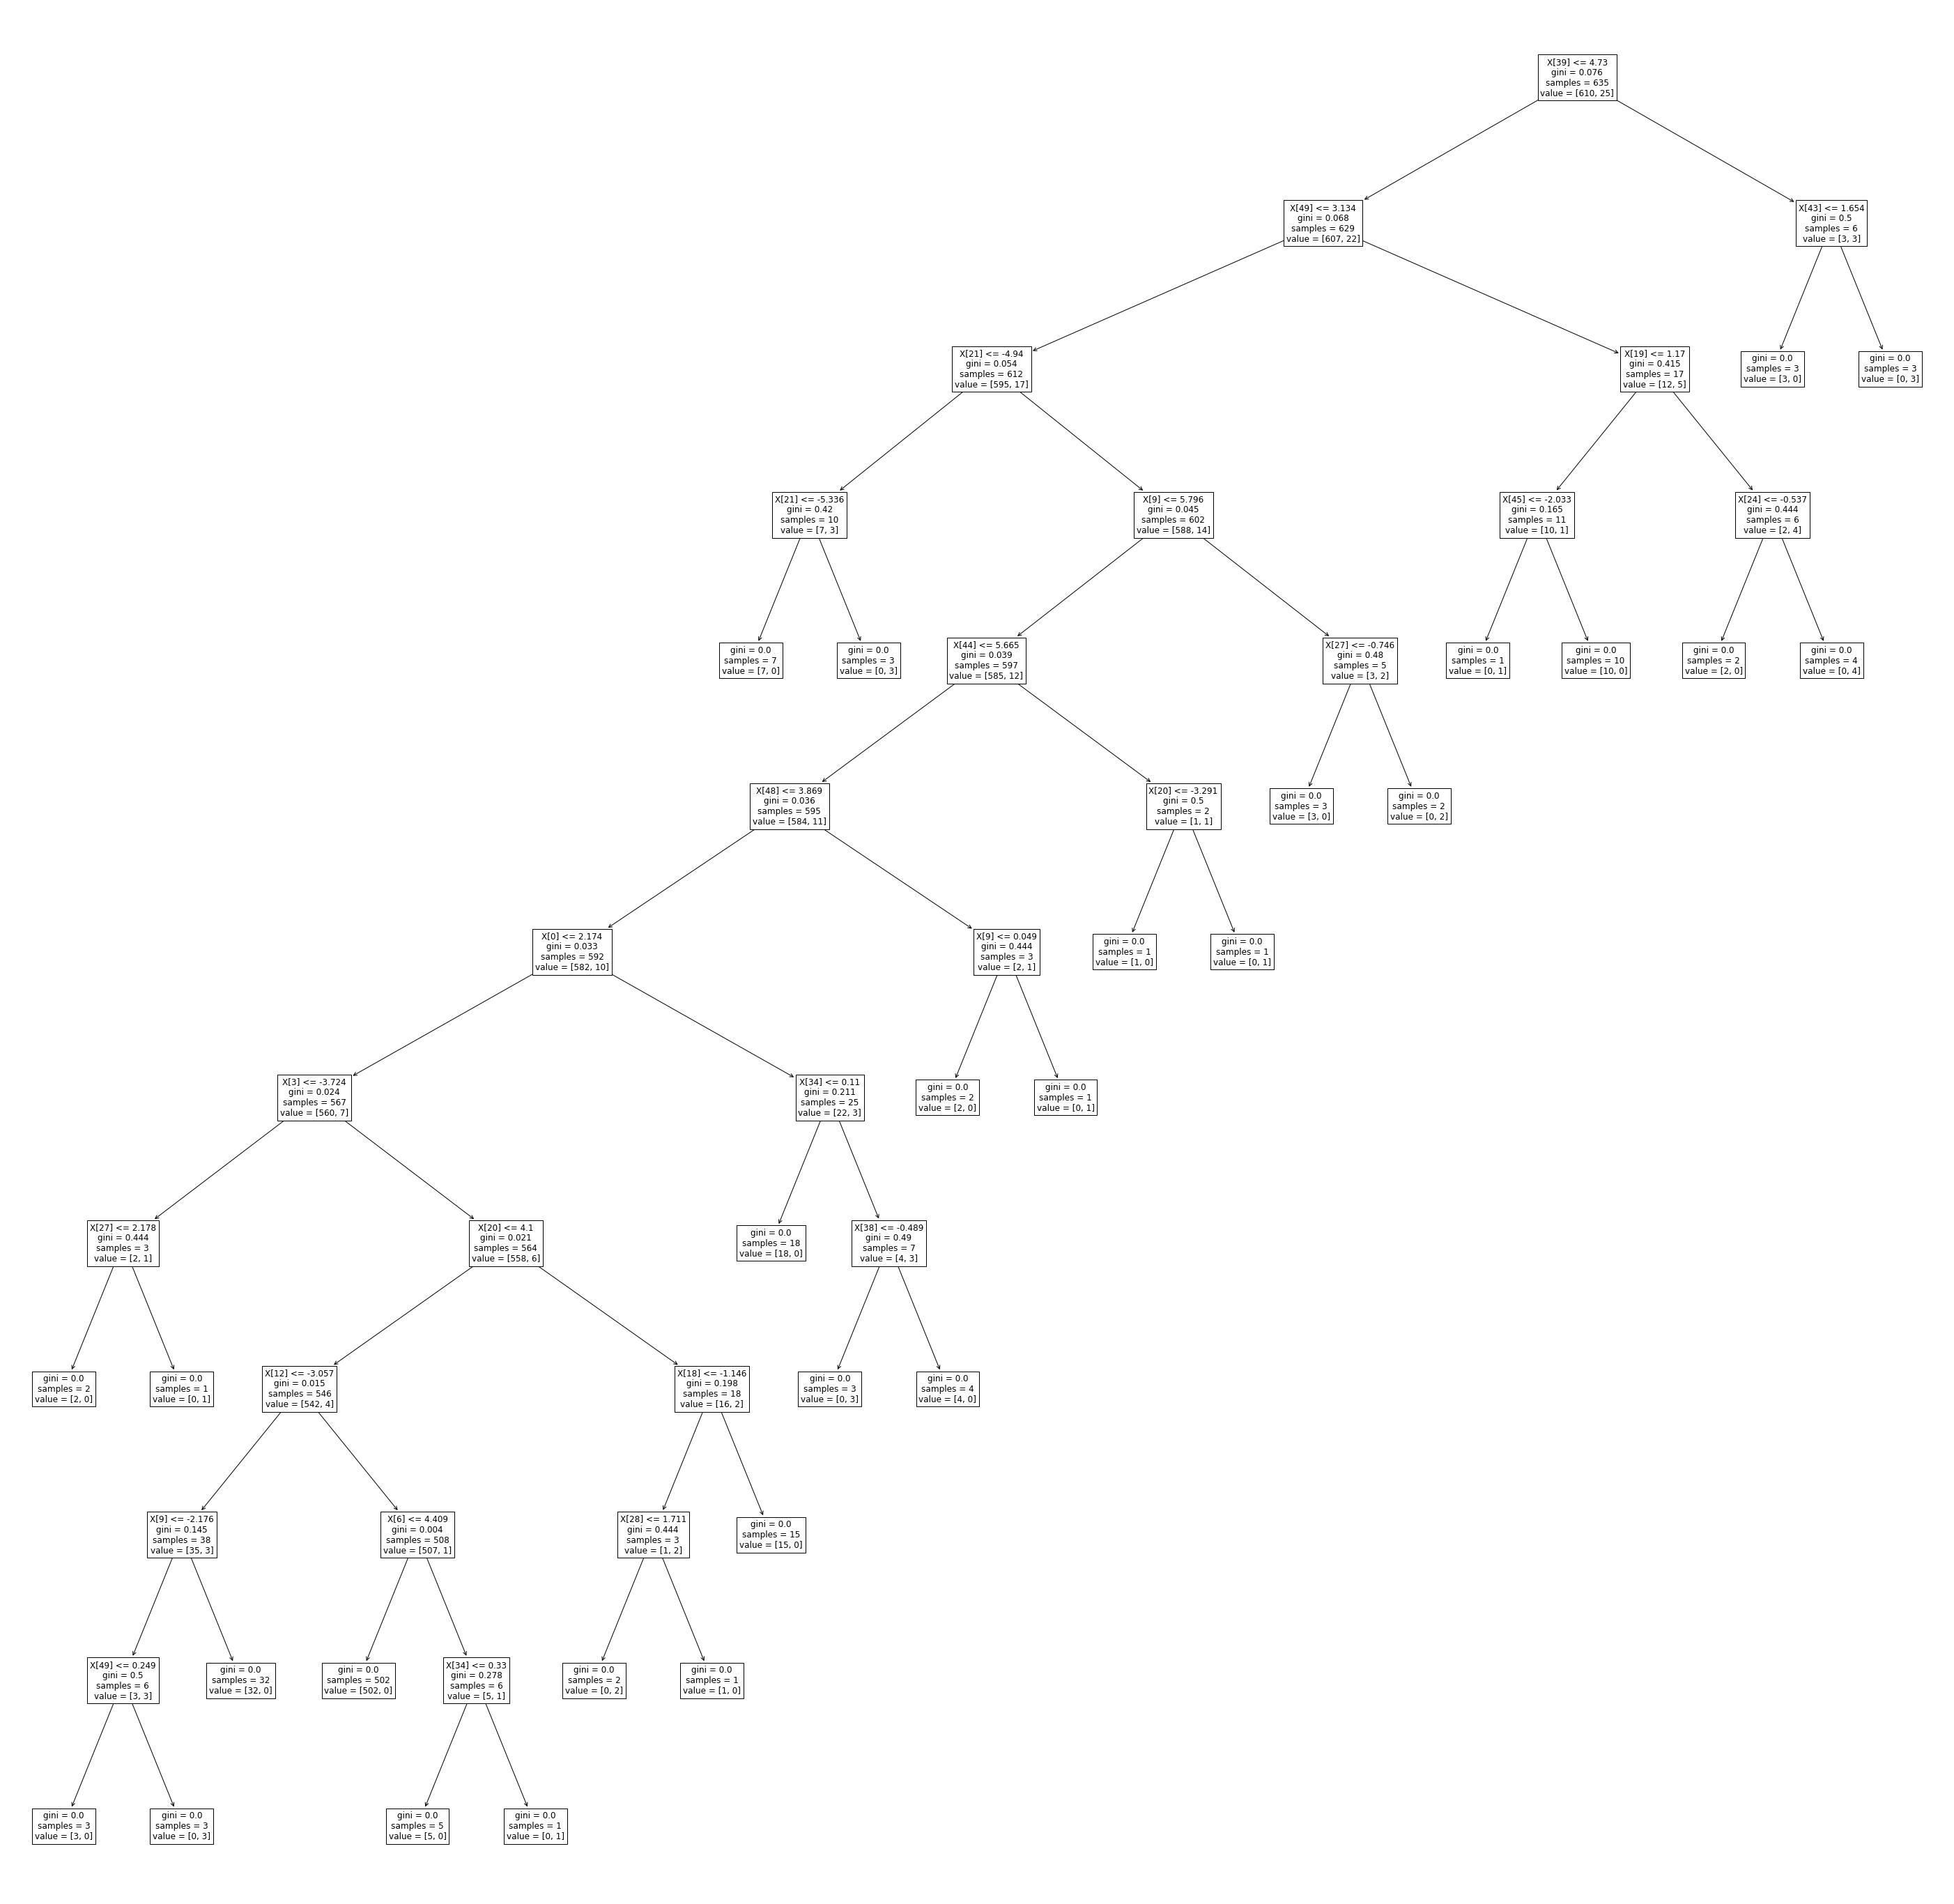

In [112]:
fig, ax = plt.subplots(figsize=(50, 50))  # whatever size you want
tree.plot_tree(secom_clf, ax=ax,fontsize=12)
plt.show()

# Using 10-fold cross-validation

In [113]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
scores = cross_val_score(secom_clf, x_train_pca_res, y_train, cv=kfold)
avg_score = np.mean(scores)
print(avg_score)

0.9086805555555555


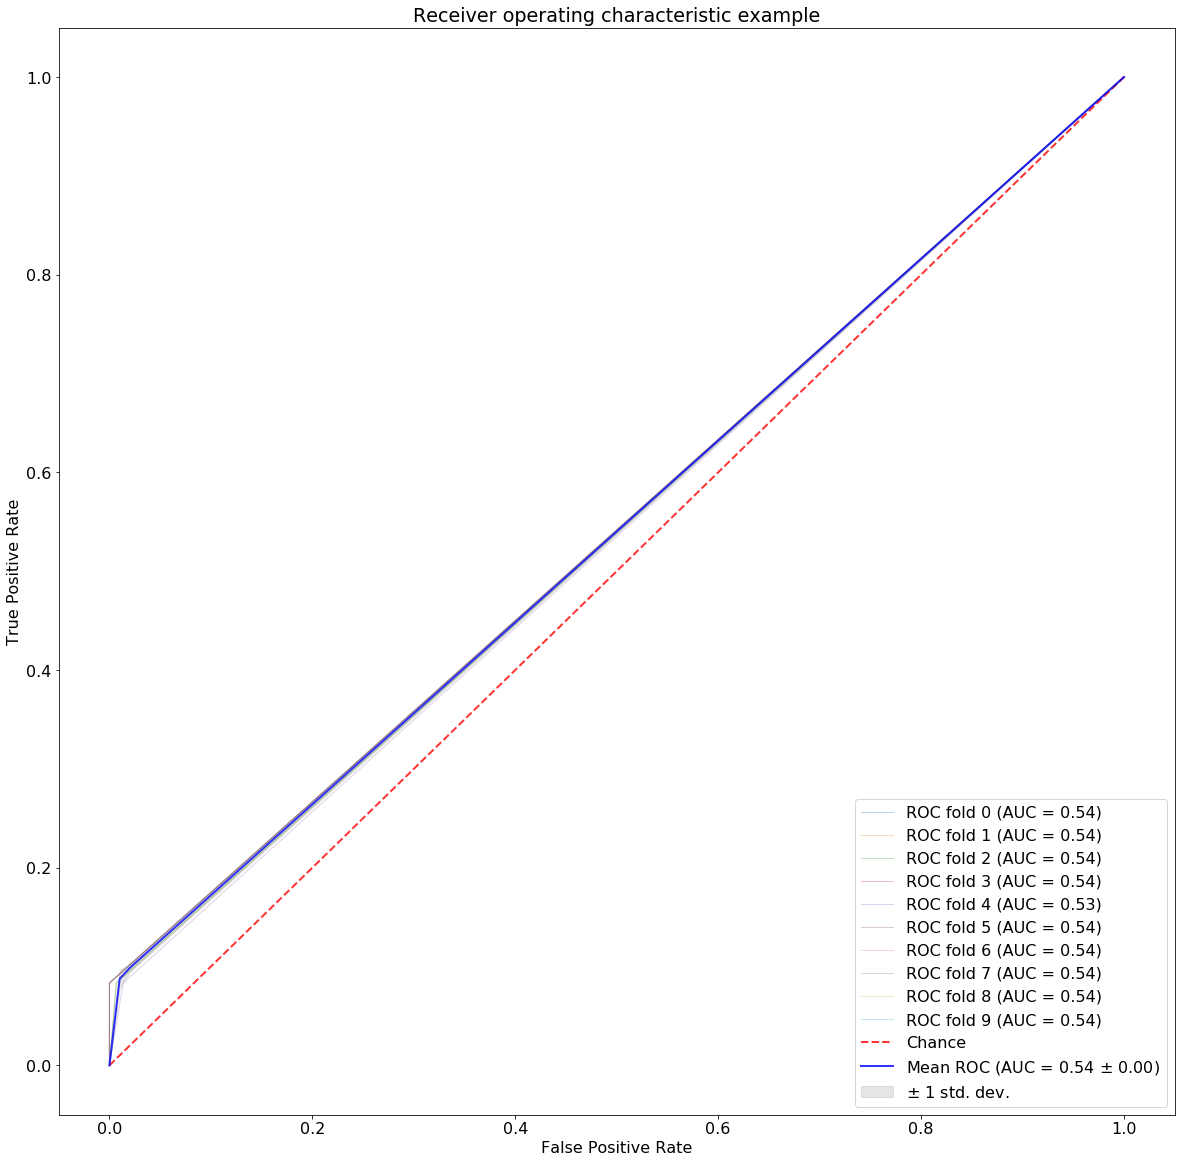

In [114]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(20, 20))
for i, (train, test) in enumerate(kfold.split(x_train_pca_res, y_train)):
    secom_clf.fit(x_train_pca_res, y_train)
    viz = plot_roc_curve(secom_clf, test_x_pca_res, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [115]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, test_y_predicted)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.15


In [116]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_y_predicted)
metrics.auc(fpr, tpr)

0.5416666666666666

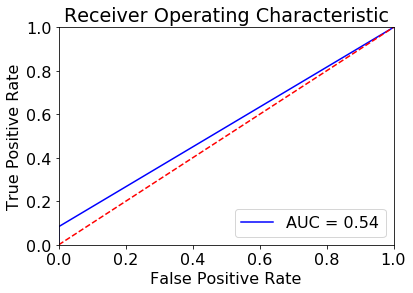

In [117]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 利用GBDT來預測

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=0)
gbm0.fit(x_train_pca_res,y_train)
gbm0_pred = gbm0.predict(test_x_pca_res)
print ("Accuracy : %.4g" %  metrics.accuracy_score(y_test, gbm0_pred))


C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy : 0.9245


Text(0.5, 1, "('Accuracy Score: {0}', 0.9308176100628931)")

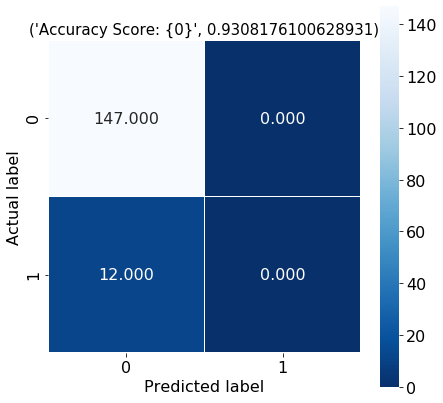

In [119]:
cm = metrics.confusion_matrix(y_test, gbm0_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}',accuracy
plt.title(all_sample_title, size = 15)

In [120]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, gbm0_pred)
metrics.auc(fpr, tpr)

0.5

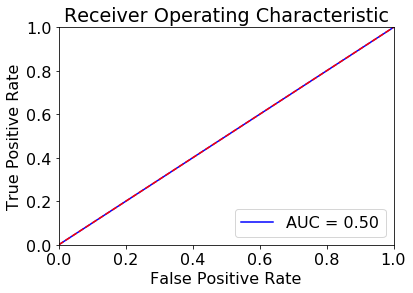

In [121]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 處理資料不平衡的問題


In [122]:
target_count = df['Label'].value_counts()

In [123]:
target_count

-1    757
 1     37
Name: Label, dtype: int64

Class 0: 757
Class 1: 37
Proportion: 0.05 : 1


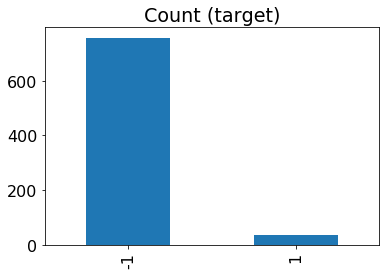

In [124]:
print('Class 0:', target_count[-1])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[1] / target_count[-1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [125]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
f1_score(y_test, test_y_predicted)

0.15384615384615385

# using smote來解決資料不平衡的問題_決策樹

In [126]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)

In [127]:
X_train_smoke, y_train_smoke = sm.fit_sample(x_train_pca_res, y_train)

In [128]:
clf = tree.DecisionTreeClassifier()
smoke_dtclf = clf.fit(X_train_smoke, y_train_smoke)
smoke_predicted = smoke_dtclf.predict(test_x_pca_res)

In [129]:
accuracy = metrics.accuracy_score(y_test, smoke_predicted)
print("Accuracy:",accuracy)
print("Precision:",metrics.precision_score(y_test, smoke_predicted))

Accuracy: 0.5220125786163522
Precision: 0.07894736842105263


In [130]:
print("smote",f1_score(y_test, smoke_predicted))
print("no_smote",f1_score(y_test, test_y_predicted))




smote 0.13636363636363635
no_smote 0.15384615384615385


In [131]:
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
scores_smote = cross_val_score(smoke_dtclf, X_train_smoke, y_train_smoke, cv=kfold,scoring='f1_macro')
avg_score_smote = np.mean(scores_smote)
print(avg_score_smote)

0.9334874953063229


# smoth 10fold validation_roc_curve

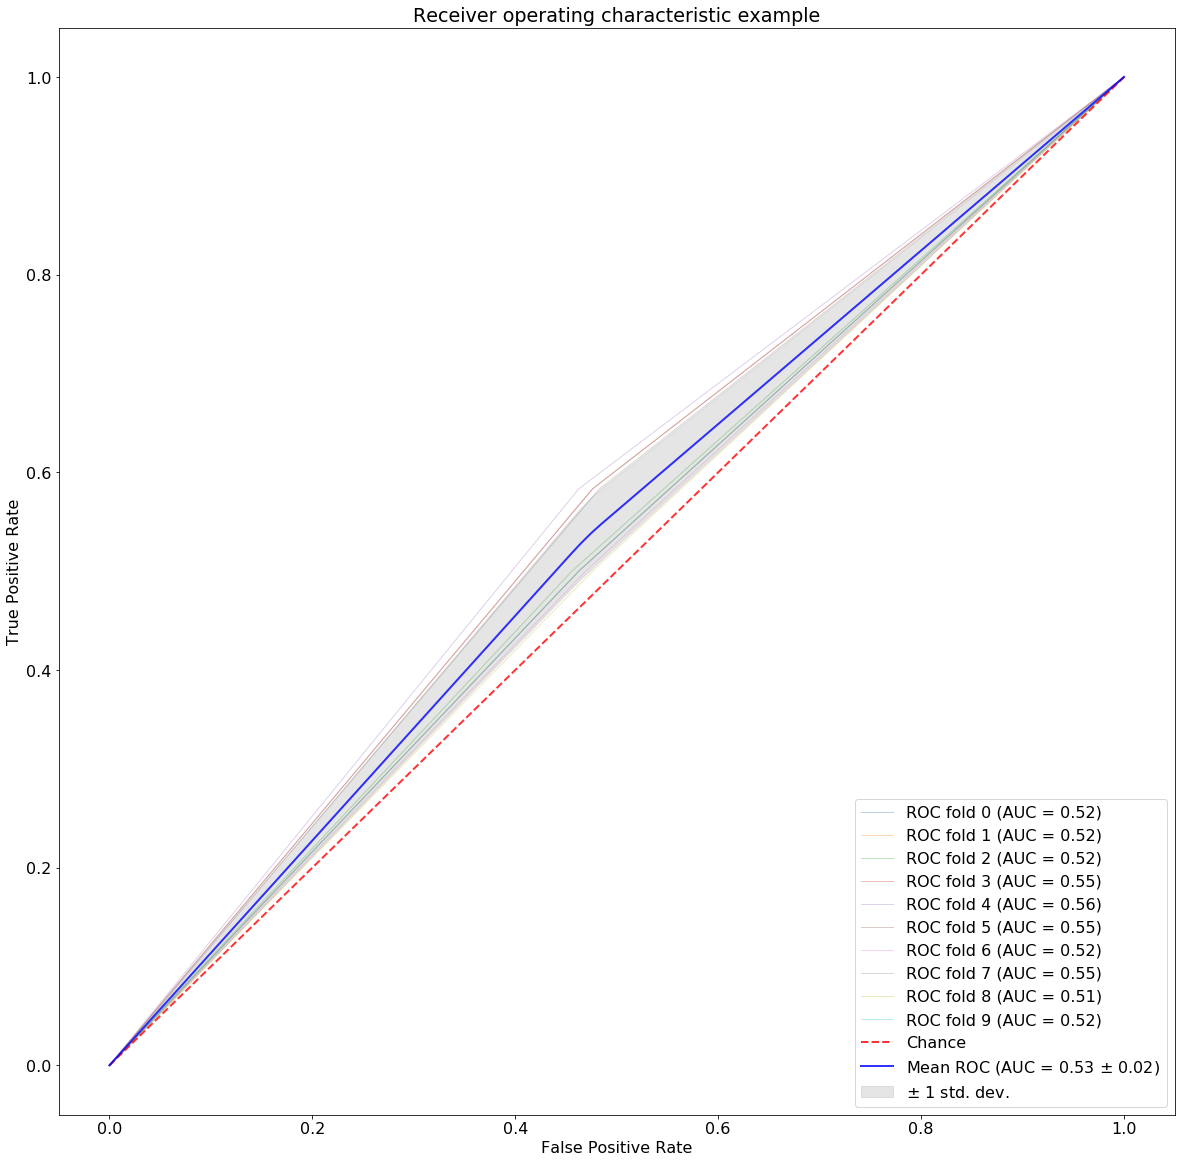

In [132]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(20, 20))
for i, (train, test) in enumerate(kfold.split(X_train_smoke, y_train_smoke)):
    smoke_dtclf.fit(X_train_smoke, y_train_smoke)
    viz = plot_roc_curve(smoke_dtclf, test_x_pca_res, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

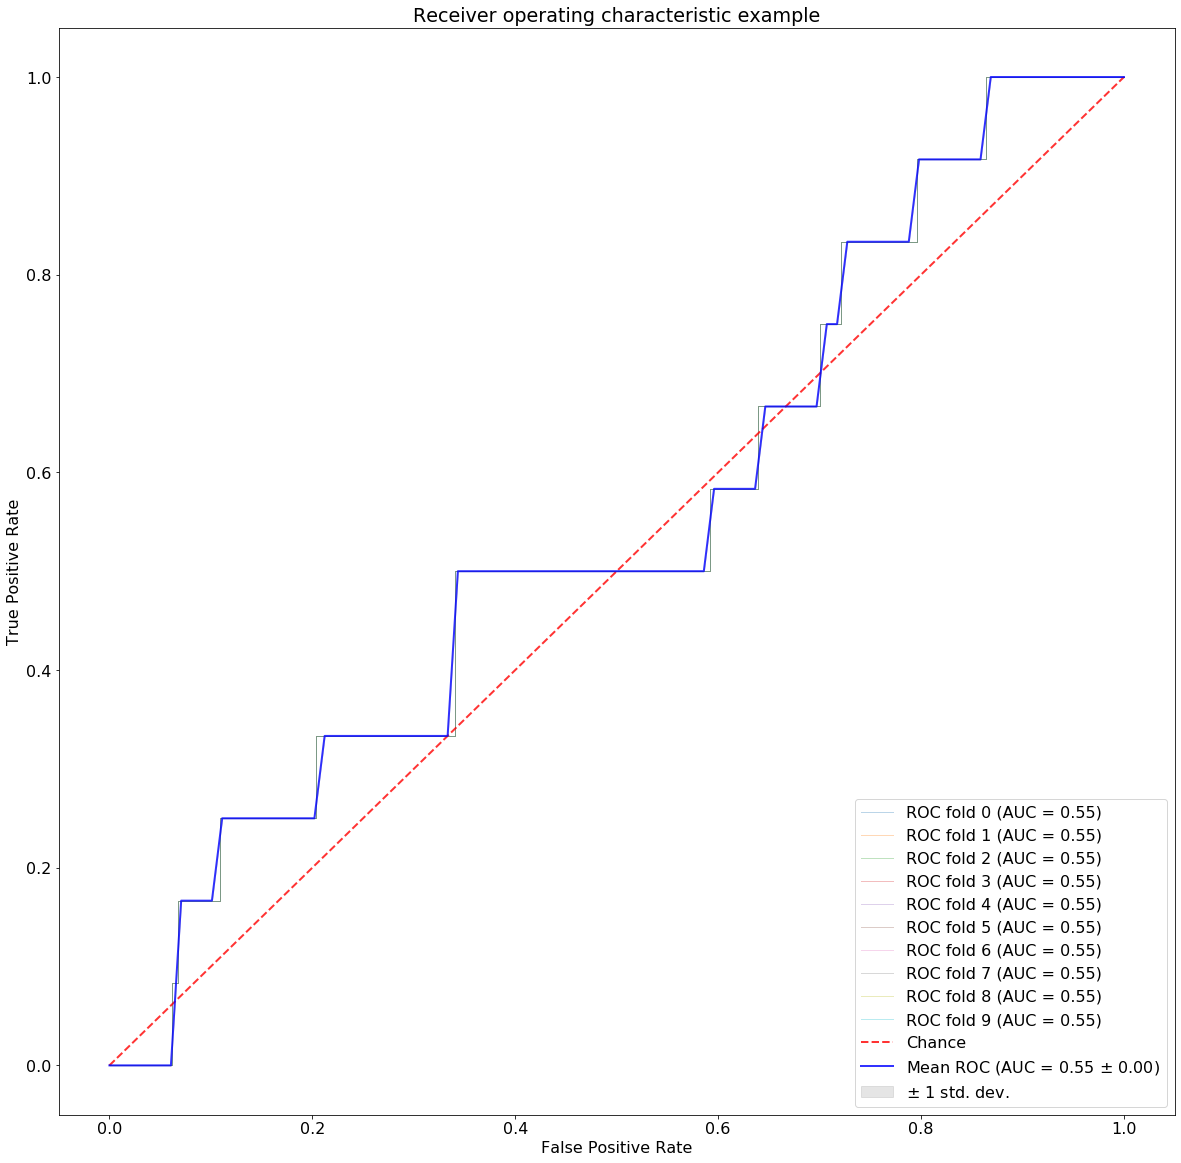

In [133]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(20, 20))
for i, (train, test) in enumerate(kfold.split(X_train_smoke, y_train_smoke)):
    gbm0.fit(X_train_smoke, y_train_smoke)
    viz = plot_roc_curve(gbm0, test_x_pca_res, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [136]:
from sklearn.ensemble import RandomForestClassifier
random_f_clf = RandomForestClassifier(max_depth=10, random_state=0)
scores_smote = cross_val_score(random_f_clf, X_train_smoke, y_train_smoke, cv=kfold,scoring='accuracy')
avg_score_smote = np.mean(scores_smote)
print(avg_score_smote)

C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\mod

0.9868852459016393


C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\user\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ra

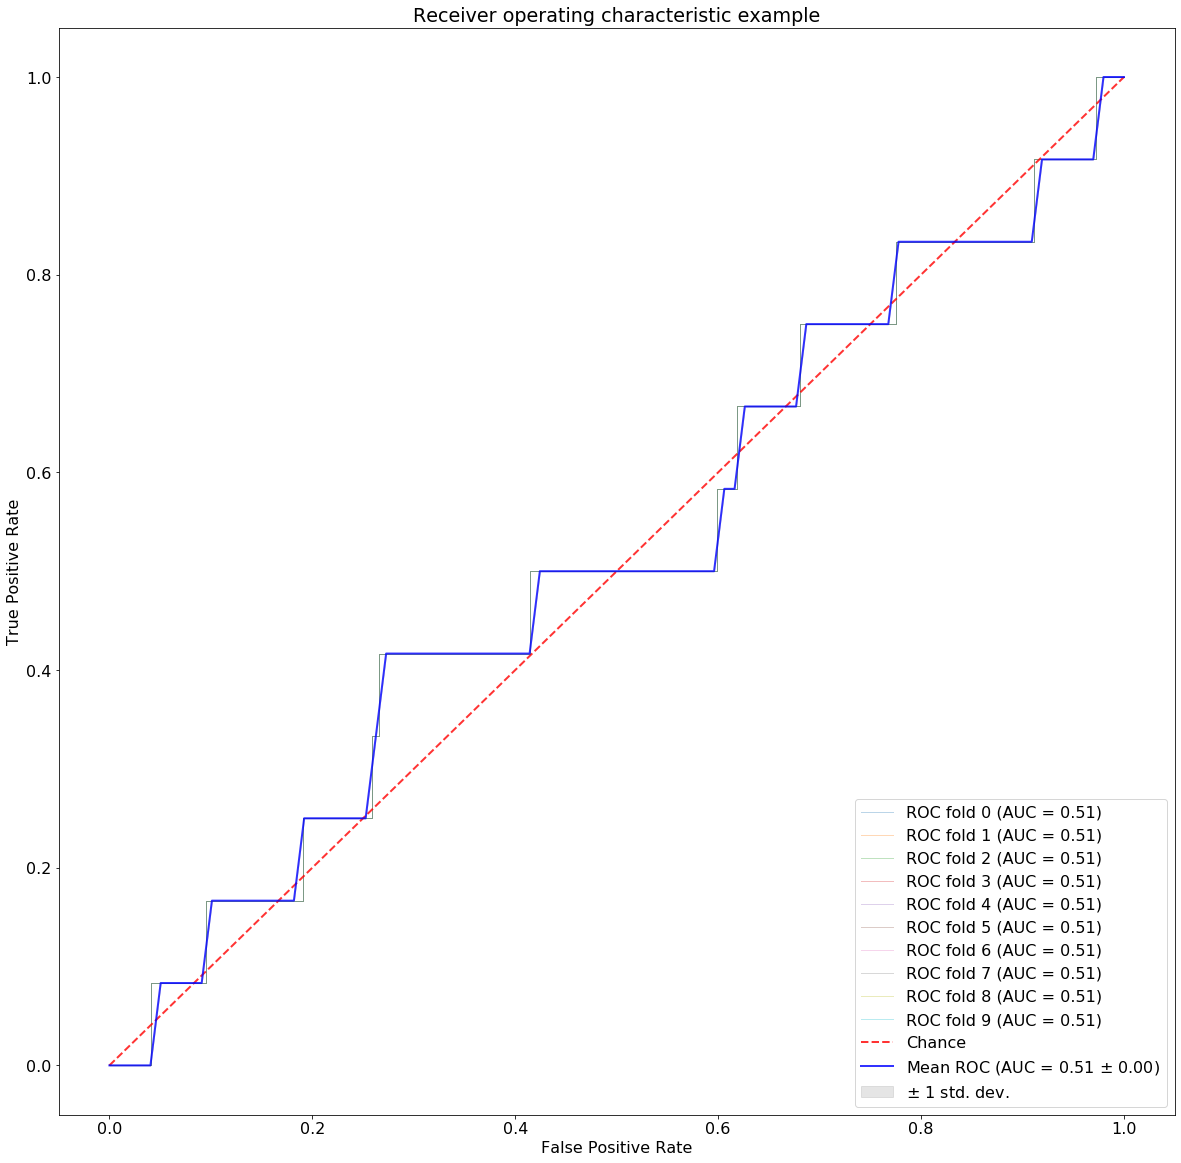

In [137]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(20, 20))
for i, (train, test) in enumerate(kfold.split(X_train_smoke, y_train_smoke)):
    random_f_clf.fit(X_train_smoke, y_train_smoke)
    viz = plot_roc_curve(random_f_clf, test_x_pca_res, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()